In [8]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pathlib
from datetime import date,datetime,timedelta

ROOT_PATH = pathlib.Path().resolve().parents[0]
plt.rcParams["font.family"] = "IPAGothic"

In [3]:
japan = gpd.read_file(ROOT_PATH/"shp/japank.shp")
df = pd.read_csv(ROOT_PATH/"csv/ans_use_msm_extract_anedas_point.csv")

In [13]:
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values(by="time")
df_extract = df[df["time"] <= datetime(2022,1,1,0,0,0)]

In [20]:
df_extract

,time,lat,lon,psea,sp,u,v,temp,rh,r1h,dswrf,predict_ncld,correct_ncld,ncld_diff
320503,2022-01-01,42.900002,143.1875,100919.265946,100052.293209,1.749236,-0.782875,261.283466,58.736239,200.0,665.0,23.239721,6.543335,-16.696385
467050,2022-01-01,35.400002,132.8750,102795.871416,102077.063814,1.253823,-2.954129,277.907885,65.894496,200.0,665.0,51.261349,93.749998,42.488649
44089,2022-01-01,38.250000,140.8750,101578.440246,100664.219804,3.688074,-1.474006,271.047470,50.768350,200.0,665.0,16.534777,25.731668,9.196891
44068,2022-01-01,43.299999,145.5625,100603.669622,100426.605129,6.886850,-4.642202,264.937127,58.894496,200.0,665.0,24.297411,0.000002,-24.297409
230609,2022-01-01,30.700001,130.9375,102831.651232,102426.605092,2.513762,-5.877676,282.578194,69.800459,200.0,665.0,31.616492,18.896668,-12.719824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388784,2022-01-01,34.599998,137.0625,102387.614543,102201.834454,7.314985,-6.440367,276.656023,85.456422,200.0,665.0,75.529146,92.284998,16.755852
106701,2022-01-01,34.400002,131.3750,102886.238387,101477.063825,0.911315,-3.333333,277.970609,58.268349,200.0,665.0,38.618908,21.923335,-16.695574
150918,2022-01-01,36.150002,137.2500,102614.220044,93926.605249,0.238532,-2.911315,267.563686,82.644495,200.0,665.0,32.765378,99.999998,67.234619
62739,2022-01-01,27.049999,142.1875,102095.871429,101914.678496,7.614679,-6.801223,290.781944,59.050459,200.0,665.0,47.914034,52.050000,4.135966


In [35]:
def color(ncld : int):
    color_list = [
        "#ffffff","#d3d3d3","#000080",
        "#1e90ff","#00bfff","#008000",
        "#006400","#ffa500","#ff0000",
        "#ff1493"
    ]
    return color_list[int(ncld / 10)],int(ncld / 10)

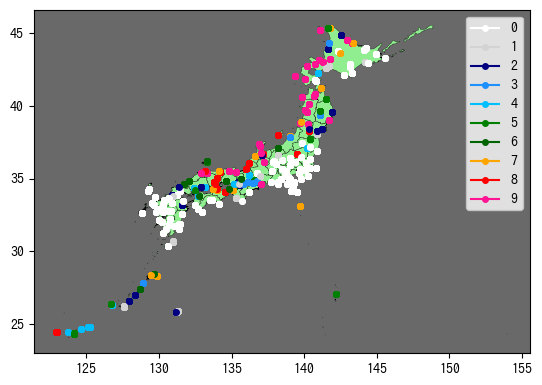

In [47]:
fig,ax = plt.subplots()
ax.set_facecolor("#696969")
japan.plot(ax=ax,color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["correct_ncld"])
    ax.plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

plt.legend(unique_handles,unique_labels)
    
plt.show()

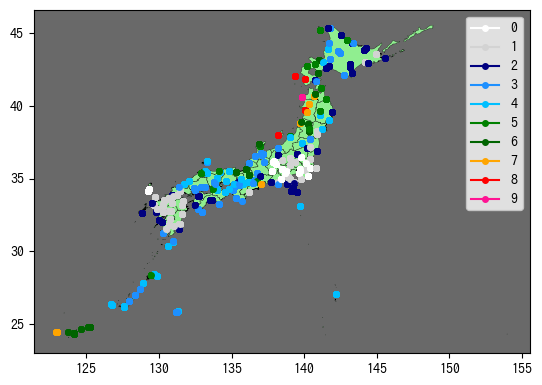

In [48]:
fig,ax = plt.subplots()
ax.set_facecolor("#696969")
japan.plot(ax=ax,color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["predict_ncld"])
    ax.plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

plt.legend(unique_handles,unique_labels)
    
plt.show()

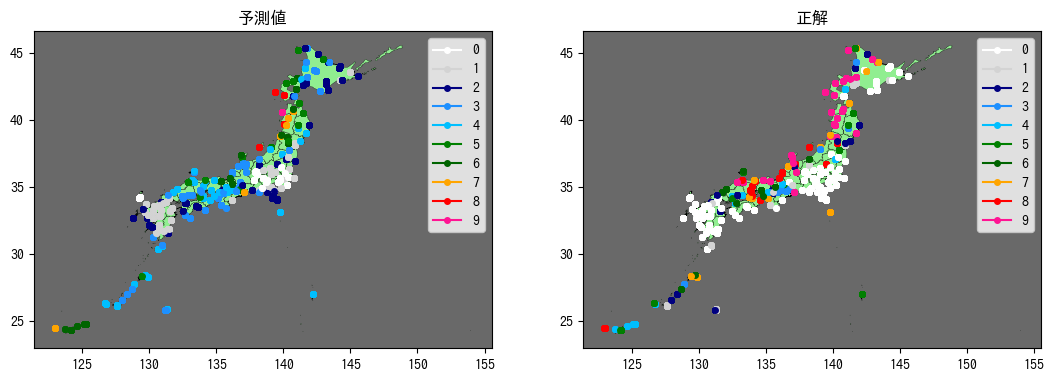

In [62]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,7))
ax[0].set_facecolor("#696969")
japan.plot(ax=ax[0],color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["predict_ncld"])
    ax[0].plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

ax[1].set_facecolor("#696969")
japan.plot(ax=ax[1],color='#90ee90',edgecolor="black",linewidth=0.2)

for i in df_extract.iterrows():
    color_,label = color(i[1]["correct_ncld"])
    ax[1].plot(i[1]["lon"],i[1]["lat"],color=color_,marker="o",markersize=4,label=label)

handles,labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

ax[0].legend(unique_handles,unique_labels)
ax[1].legend(unique_handles,unique_labels)

plt.title("官所に絞った雲量予測とその結果")
ax[0].set_title("予測値")
ax[1].set_title("正解")

plt.savefig(ROOT_PATH/"png/予測結果.png",facecolor="white")
plt.show()